In this problem, a K-nearest neighbor (K-NN) classifier is implemented to classify handwritten digits from a subset of the MNIST dataset.  In order to reduce computation time only the digits 1, 2, and 7 are used.


<b>2a)</b> Use your K-NN classifier and $N=200$ training examples from each class to classify the test dataset.  Report the accuracy on the test data for $K=1$ and $K=3$.

In [1]:
import numpy as np
import imp
N_samp = 200
N_test = 0 #setting =0 uses all test examples from the dataset.
digit_list = [1, 2, 7]
import problem2_func
imp.reload(problem2_func)
[x_train, y_train, x_test, y_test]=problem2_func.load_digits(N_samp,N_test,digit_list)

y1 = problem2_func.classify(x_train,y_train,x_test,1)
print('Accuracy of K=1 NN:', problem2_func.accuracy(y_test,y1))
y3 = problem2_func.classify(x_train,y_train,x_test,3)
print('Accuracy of K=3 NN:', problem2_func.accuracy(y_test,y3))

Accuracy of K=1 NN: 0.9599374021909233
Accuracy of K=3 NN: 0.955868544600939


<b>2b)</b> Display 5 test digits that were correctly classified and 5 that were incorrectly classified.  

[2] incorrectly classified as [1]


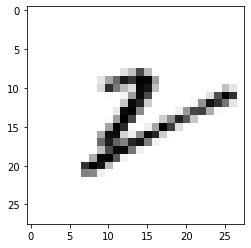

[2] incorrectly classified as [1]


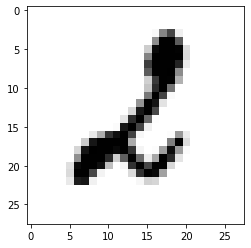

[2] incorrectly classified as [1]


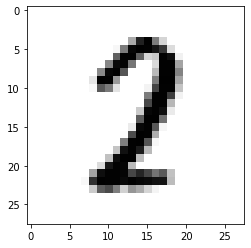

[7] incorrectly classified as [2]


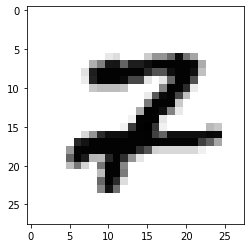

[7] incorrectly classified as [2]


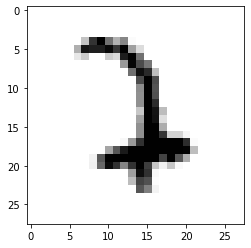

In [6]:
import random
incorrect_labels = np.argwhere(y1.flatten()!=y_test.flatten()).flatten()
random.shuffle(incorrect_labels)
incorrect_labels = incorrect_labels[0:5]

for i in incorrect_labels:
    print(y_test[i], 'incorrectly classified as', y1[i])
    problem2_func.plot(x_test[i, :])

[1] correctly classified as [1]


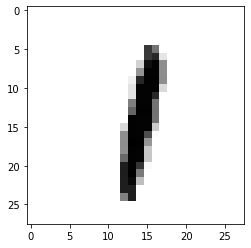

[2] correctly classified as [2]


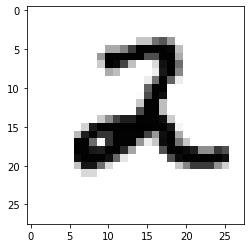

[1] correctly classified as [1]


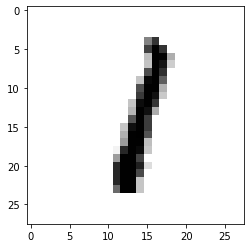

[2] correctly classified as [2]


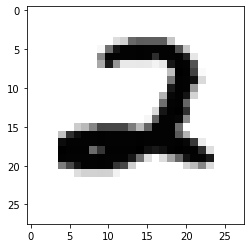

[7] correctly classified as [7]


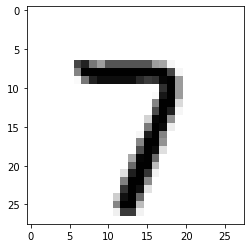

In [8]:
correct_labels = np.argwhere(y1.flatten()==y_test.flatten()).flatten()
random.shuffle(correct_labels)
correct_labels = correct_labels[0:5]

for i in correct_labels:
    print(y_test[i], 'correctly classified as', y1[i])
    problem2_func.plot(x_test[i, :])

<b>2c)</b> Implement a function that does 5-fold cross validation on the training data x_train, y_train from part (a) in order to estimate the accuracy of the classifier for $K=1, 3, 5, 7, 9$.  Plot these accuracy estimates vs $K$ and report the classifier with the best accuracy.

The most accurate classifier has K= 1  with cross-validation accuracy: 0.9237500000000001


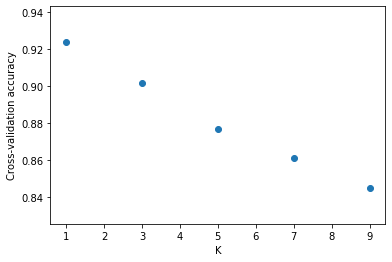

In [9]:
kvals = [1, 3, 5, 7, 9]
acc = np.zeros(len(kvals))
for i in range(len(kvals)):
    acc[i] = problem2_func.cross_valid_acc(x_train,y_train,5,kvals[i])
plt.scatter(kvals,acc)
plt.xlabel('K')
plt.ylabel('Cross-validation accuracy')
k_best = kvals[np.argmax(acc)]
print('The most accurate classifier has K=', k_best, ' with cross-validation accuracy:', acc[np.argmax(acc)])


<b>2d)</b> For the best classifier from 2c, report the accuracy on the held-out test data.

In [10]:
K = k_best
yy = problem2_func.classify(x_train,y_train,x_test,K)
print('Accuracy of the best classifer from 2c on held-out test data:', problem2_func.accuracy(y_test,yy))

Accuracy of the best classifer from 2c on held-out test data: 0.9599374021909233
